In [1]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('monthly-milk-production.csv','\;')
data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


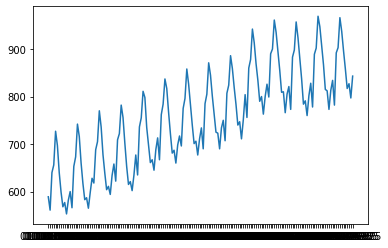

In [14]:
import matplotlib.pyplot as plt
plt.plot(data.month,data.milk)

#### 4 Задача  

In [15]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(data.milk)

(-1.3038115874221248,
 0.6274267086030337,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Ответ:p=0,62, гипотеза нулевая верна. Есть единичный корень

#### 5 Задача

In [36]:
data['av_day']=data['milk']/pd.to_datetime(data.month,dayfirst=True).dt.days_in_month
data.head()

,month,milk,av_day
0,01.01.1962,589,19.000000
1,01.02.1962,561,20.035714
2,01.03.1962,640,20.645161
3,01.04.1962,656,21.866667
4,01.05.1962,727,23.451613


In [32]:
pd.to_datetime(data.month,dayfirst=True)

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: month, Length: 168, dtype: datetime64[ns]

In [37]:
data.av_day.sum()

4166.326661899466

In [38]:
sm.tsa.stattools.adfuller(data.av_day)

(-1.1798216373266228,
 0.682215151308136,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

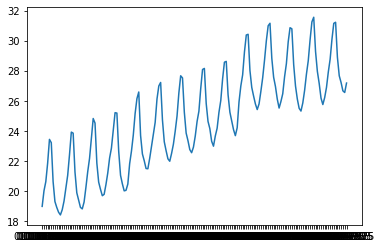

In [39]:
plt.plot(data.month,data.av_day)

In [61]:
data['daily_diff1'] = data.av_day - data.av_day.shift(1)
data['daily_diff12'] = data.av_day - data.av_day.shift(12)
data['daily_diff13'] = data['daily_diff12'] - data['daily_diff12'].shift(1)

In [46]:
data

,month,milk,av_day,daily_diff1,daily_diff12
0,01.01.1962,589,19.000000,NaN,NaN
1,01.02.1962,561,20.035714,1.035714,NaN
2,01.03.1962,640,20.645161,0.609447,NaN
3,01.04.1962,656,21.866667,1.221505,NaN
4,01.05.1962,727,23.451613,1.584946,NaN
...,...,...,...,...,...
163,01.08.1975,858,27.677419,-1.225806,-0.290323
164,01.09.1975,817,27.233333,-0.444086,0.066667
165,01.10.1975,827,26.677419,-0.555914,0.483871
166,01.11.1975,797,26.566667,-0.110753,0.800000


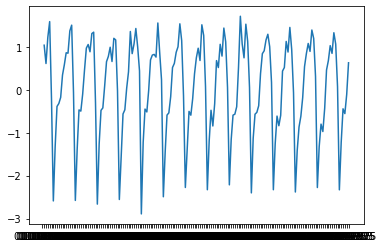

In [47]:
plt.plot(data.month,data.daily_diff1)

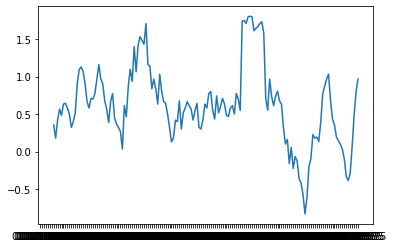

In [48]:
plt.plot(data.month,data.daily_diff12)

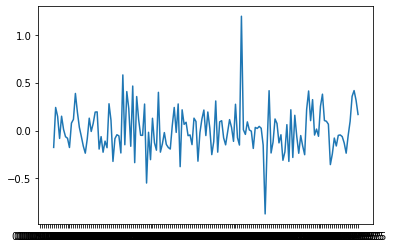

In [62]:
plt.plot(data.month,data.daily_diff13)

In [53]:
sm.tsa.stattools.adfuller(data['daily_diff1'].iloc[1:])

(-2.7594694762289533,
 0.06430054654174037,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.153997338105512)

In [55]:
data['daily_diff12'].iloc[12:]

12     0.354839
13     0.178571
14     0.419355
15     0.566667
16     0.483871
         ...   
163   -0.290323
164    0.066667
165    0.483871
166    0.800000
167    0.967742
Name: daily_diff12, Length: 156, dtype: float64

In [56]:
sm.tsa.stattools.adfuller(data['daily_diff12'].iloc[12:])

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [63]:
sm.tsa.stattools.adfuller(data['daily_diff13'].iloc[13:])

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

#### 8 Задача

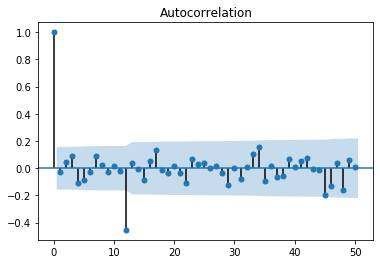

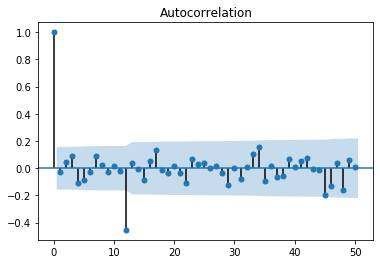

In [64]:

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data['daily_diff13'].iloc[13:].values.squeeze(), lags=50)

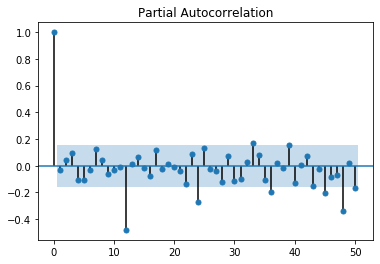

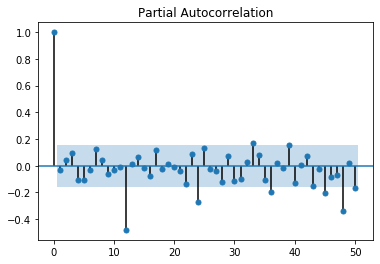

In [65]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data['daily_diff13'].iloc[13:].values.squeeze(), lags=50)

In [67]:
import statsmodels
statsmodels.__version__

'0.11.0'